In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import Data
Data = pd.read_csv('kc_house_data.csv')
Data.head(5).T
#get some information about our Data-Set
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

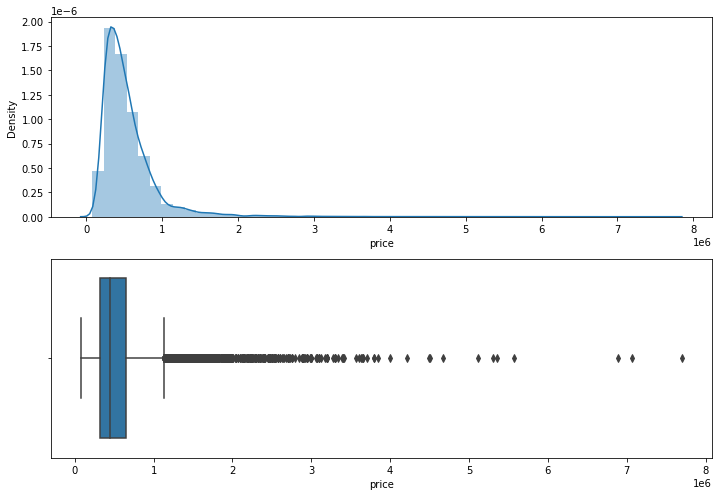

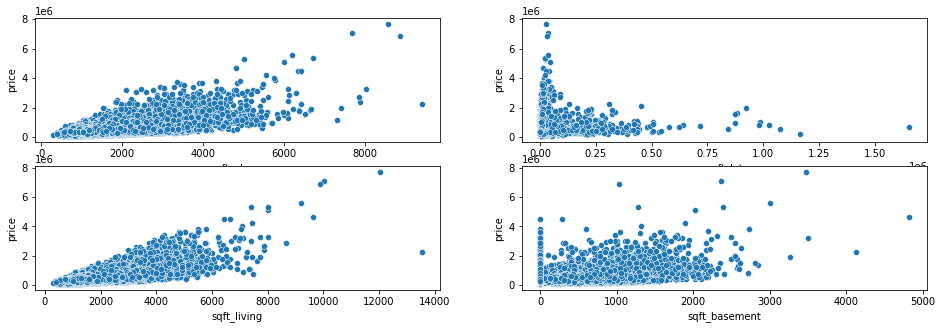

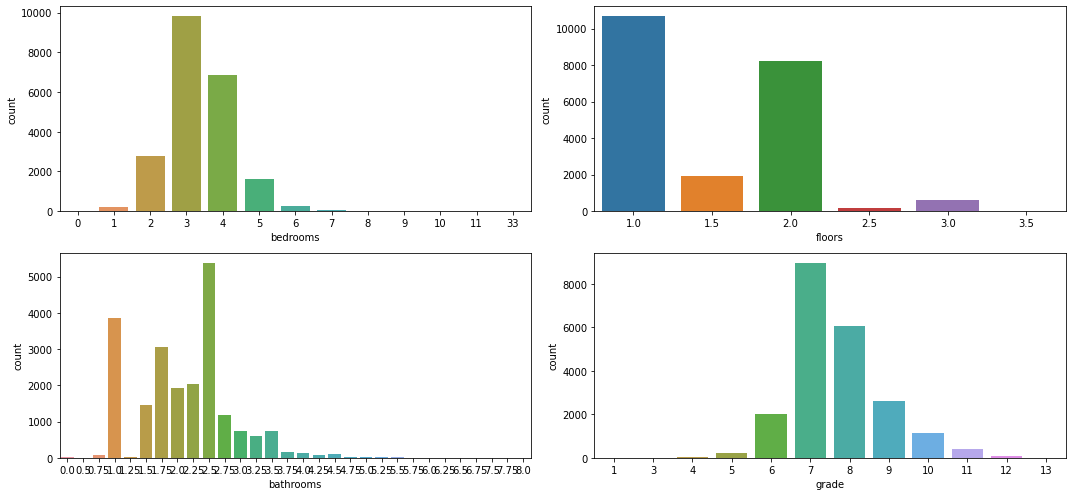

In [ ]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])
#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])
plt.tight_layout()

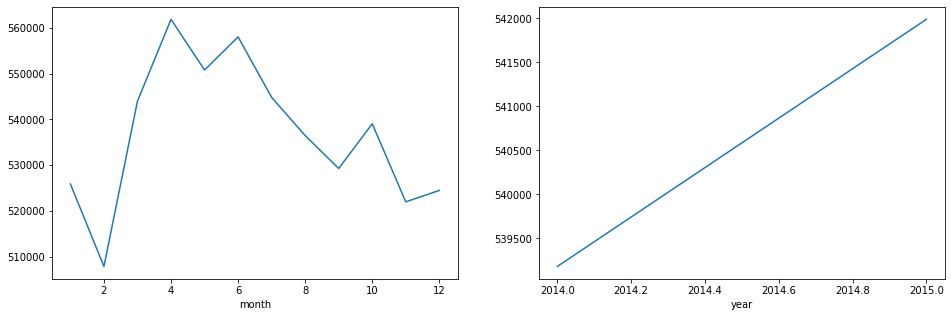

In [ ]:
#let's break date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [ ]:
# check if there are any Null values
Data.isnull().sum()
# drop some unnecessary columns
Data = Data.drop('date',axis=1)
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [ ]:
X = Data.drop('price',axis =1).values
y = Data['price'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [ ]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# having 19 neuron is based on the number of available features
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
114/114 [==============================] - 1s 4ms/step - loss: 425249538048.0000 - val_loss: 428700729344.0000
Epoch 2/400
114/114 [==============================] - 0s 3ms/step - loss: 422830473216.0000 - val_loss: 419925884928.0000
Epoch 3/400
114/114 [==============================] - 0s 3ms/step - loss: 390081806336.0000 - val_loss: 343379443712.0000
Epoch 4/400
114/114 [==============================] - 0s 4ms/step - loss: 254604525568.0000 - val_loss: 156938813440.0000
Epoch 5/400
114/114 [==============================] - 0s 3ms/step - loss: 115012960256.0000 - val_loss: 84755914752.0000
Epoch 6/400
114/114 [==============================] - 0s 3ms/step - loss: 78722072576.0000 - val_loss: 65653374976.0000
Epoch 7/400
114/114 [==============================] - 0s 3ms/step - loss: 63966154752.0000 - val_loss: 55768137728.0000
Epoch 8/400
114/114 [==============================] - 0s 3ms/step - loss: 56516268032.0000 - val_loss: 50974674944.0000
Epoch 9/400
114/114 [==

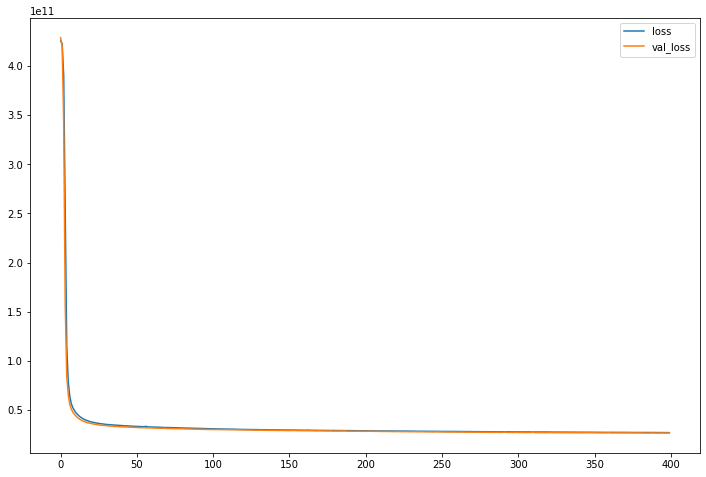

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 102515.02231266648
MSE: 26763287446.679203
RMSE: 163594.8882046111
VarScore: 0.8053034075627226


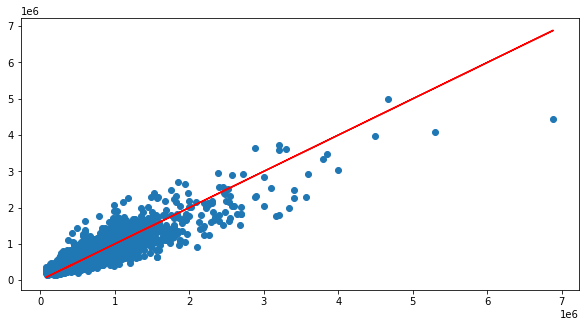

In [ ]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')